In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gpa_scatter_plot():
    """
    :returns: tuple; 
    first value true if the data is linear,
    second value true if the data  is exact
    """
    #But I want to use code to generate data that looks like his
    #And then use code to derive the answers; that a line seems appropriate
    #But the line would not be exact...
    return (True, False)

    

In [3]:
from scipy.stats import pearsonr 

In [10]:
assert gpa_scatter_plot()== (True, False), 'Data appears linear, but not exact, fair amount of deviation'
gpa_scatter_plot_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48723633/m-48403763'

In [11]:
def scatter_plot_region():
    """
    :returns : where a point is, if HS GPA == College GPA
    On a graph where a 45 degree line is plotted
    """
    return 'On the line'


In [12]:
assert scatter_plot_region() == 'On the line', 'By definition, this line contains all points where HS GPA == College GPA'
scatter_plot_region_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48755048/m-48369769'

In [13]:
def scatter_plot_regions_2():
    """
    :returns : where a point is, if his HS GPA < College GPA
    On a graph where 45 degree line is plotted
    """
    return 'Below the line'



In [14]:
assert scatter_plot_regions_2() == 'Below the line', 'If HS GPA is below College GPA, and HS GPA is plotted on the x-axis (considered independent variable?) then a studnet with HS GPA < College GPA is below the line'
scatter_plot_regions_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48605866/m-48738056'

In [4]:
def page_load_scatter_plot():
    """
    :returns: tuple,  re: Page-Load-Time (on x-axis) and CTR (on y-axis)
    0-index if related
    1-index if linear
    2-index if exact
    3-index if positive
    4-index if negative
    """
    positive = False
    return (True, False, False, positive, not positive)


In [6]:
def relationship():
    return ('related', 'negative')

In [8]:
def relationship_2():
    return { 'related' : True, 'linear' : False, 'exact' : False, 'positive': False, 'negative' : True }

In [9]:
relationship_2()

{'exact': False,
 'linear': False,
 'negative': True,
 'positive': False,
 'related': True}

In [17]:
assert page_load_scatter_plot()==(True, False, False, False, True), 'Data appears related (i.e. page load time affects CTR) to slope downward and to right, but then flattens out; not completely linear. Not exact; some deviations. Slopes downward therefore negative, therefore not positive'
page_load_scatter_plot_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48452977/m-48717285'

In [10]:
upward_data = pd.Series((1, 2.1, 3, 3.9, 5, 6.1))
exact_level_data = pd.Series((3, 3.1, 2.9, 3, 3.2, 2.8))
nonexact_level_data = pd.Series((3, 4, 2, 3, 4.1, 2.1))
downward_data = pd.Series(list(reversed(upward_data)))#[::-1]) #pd.Series()

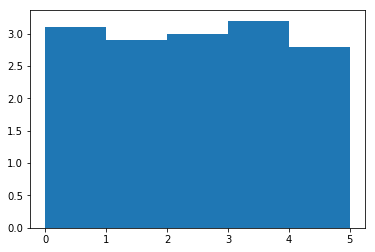

In [57]:
def add_more_level_datapoints(already_level_series, num_times=10, shrink=1):
    """
    Nates own function which tries to 'add noise' 
    to the data"""
    r=already_level_series.copy()
    for i in range(num_times):
        a=already_level_series.copy()
        
        i=a.index+np.random.rand(len(a))
        d=np.random.permutation(a.data)+np.random.rand(len(a))/shrink
        d= a.data + np.random.rand(len(a))#1)
        r=r.append(pd.Series(index=i, data=d))
    return r

def learning_to_barchart(data=None,num_bins=5):
    """
    Bar charts with bins
    """
    #import itertools
    m_sorted = (data if data is not None else exact_level_data).sort_index()
    #using numpy.linspace https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    # to create the bins 
    #linspace is nice because it accepts a num argument, and determines the even space needed for each bar
    #versus a range(...) function, which would 
    m_bins = np.linspace(min(m_sorted.index), max(m_sorted.index), num_bins+1)
    
    binning_m = pd.cut(m_sorted.index, m_bins)
    m_bins_means = map(np.mean, zip(m_bins, m_bins[1:]))
    binned_meaned = m_sorted.groupby(binning_m).mean()
    #print(binned_meaned)
    w=m_bins[1]-m_bins[0]
    #print(binned_meaned)
    plt.bar(list(m_bins_means), binned_meaned.data,width=w)
learning_to_barchart()
    #plt.bar(bm.index,bm.data)

In [58]:
from plotting import *

def bar_chart_to_scatter_plot():
    """
    
    :returns : which bar chart looks most similar;
    Uses subplots to plot the examples:
    http://matplotlib.org/mpl_examples/subplots_axes_and_figures/subplot_demo.py
    """
    
    plt.show()
    shrink = 3
    plots =[upward_data, 
               add_more_level_datapoints(upward_data, shrink), 
               exact_level_data,
               add_more_level_datapoints(exact_level_data, shrink), 
               nonexact_level_data,
               add_more_level_datapoints(nonexact_level_data, shrink), 
               downward_data,
               add_more_level_datapoints(downward_data, shrink), 
               downward_data]
    plt.figure(figsize=(len(plots),10))
    for i, d in enumerate(plots):
        d=d.copy().sort_index()
        #First draw scatter plot on the left
        #plt.axis([0,6,0,6])
        plt.subplot(len(plots),2,i*2+1)
        plt.scatter(d.index, d.data)
        
        #Then corresponding *bar* plot on the right
        #plt.axis([0,6,0,6])
        plt.subplot(len(plots),2,i*2+2)
        #print(d.index)
        #print(d.data)
        #This is Udacity's; doesn't work well; doesn't bin 
        #barplot(d.index,d.data)
        #This doesn't work quite right yet either
        learning_to_barchart(d)
        #plt.hist((d+0.01).data, bins=[0,1,2,3,4,5])
        #plt.bar(d.index, d.data)
    plt.show()
    return 'downward_data'
    

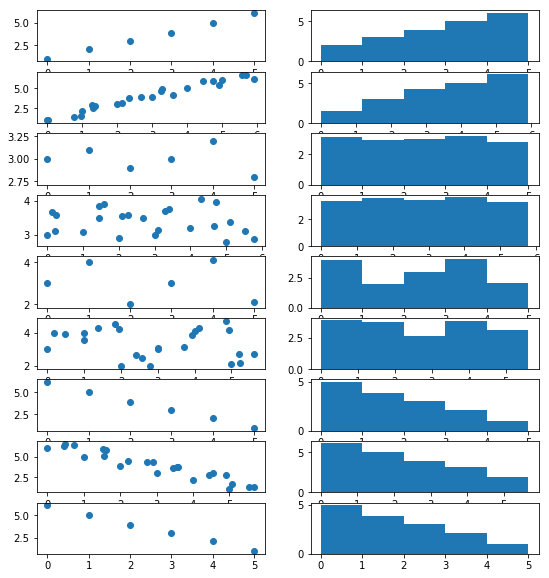

In [59]:
assert bar_chart_to_scatter_plot()=='downward_data', 'The bar chart should slope downwards more steeply than his, but a downward bar chart is the closest'
bar_chart_to_scatter_plot_solution='https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48748095/m-48403762'

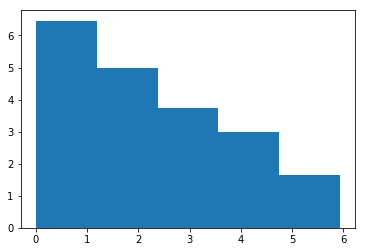

In [65]:
d = downward_data
#learning_to_barchart(d)
learning_to_barchart(add_more_level_datapoints(d))

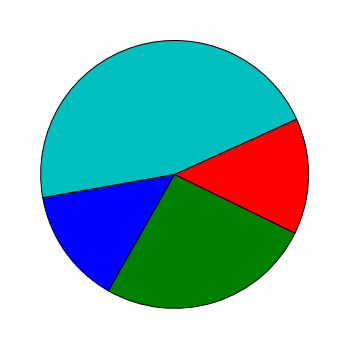

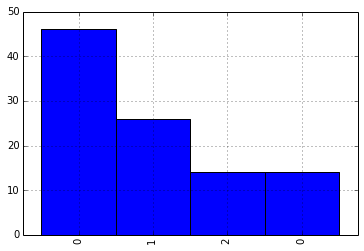

In [249]:
assert pie_chart_to_histogram()=='two_bars_roughly_equal', 'Two bars should be roughly equal'
pie_chart_to_histogram_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48686796/m-48725201'

In [257]:
hist_data = pd.Series(np.ones(4))
def histogram_to_pie_chart(h=hist_data):
    """
    Given a histogram, which pie chart came from roughly same data
    """
    h.plot(kind='bar', width=1)
    plt.figure(figsize=(6,6))
    h.plot(kind='pie')
    return 'roughly_all_portions_equal'
    

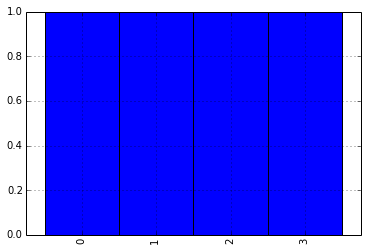

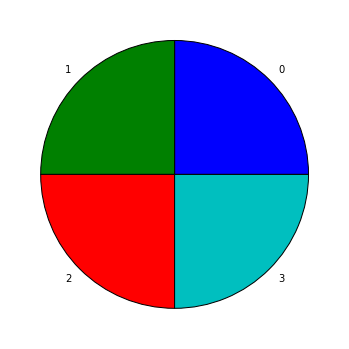

In [258]:
assert histogram_to_pie_chart()=='roughly_all_portions_equal', 'All portions look roughly equal'
histogram_to_pie_chart_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48299988/e-48759016/m-48403765'